## PROJETO 02: PREVENDO DEMANDA DE ESTOQUE COM BASE EM VENDAS - EMPRESA BIMBO DO MÉXICO

![<caption>](640px-Logo_Grupo_BIMBO.svg.png)

O Grupo Bimbo (https://www.grupobimbo.com), se esforça para atender a demanda diária dos consumidores por produtos frescos de panificação nas prateleiras de mais de 1 milhão de lojas ao longo das suas 45.000 lojas em todo o méxico. atualmente, os cálculos diários de estoque são realizados por funcionários de vendas de entregas diretas, que devem, sozinhos, prever a necessidade de estoque dos produtos e demanda com base em suas experiências pessoais em cada loja. como alguns pães têm uma vida útil de uma semana, a margem aceitável para o erro é pequena. neste projeto de aprendizado de máquina, deve-se desenvolver um modelo para prever com precisão a demanda de estoque com base nos dados históricos de vendas. isso fará com que os consumidores dos mais de 100 produtos de panificação não fiquem olhando para as prateleiras vazias, além de reduzir o valor gasto com reembolsos para os proprietários de lojas com produtos excedentes impróprios para venda.


#### DICIONÁRIO DE DADOS:

#### File descriptions:

#### producto_tabla.csv:

**Producto_ID** - Produto_ID

**NombreProducto**- Nome_Produto

#### cliente_tabla.csv:

**Cliente_ID** - Cliente_ID

**NombreCliente** - Nome_Cliente

#### state_state.csv

**Agencia_ID** - Agencia_ID

**Town** - Cidade

**State** - Estado
    

#### train.csv:
   

**Semana** - Semana

**Agencia_ID** - Deposito_ID

**Canal_ID** - Canal.Venda

**Ruta_SAK** - Rota_ID

**Cliente_ID** - Cliente_ID

**Producto_ID** - Produto_ID

**Venta_uni_hoy** - Venda.Unidade

**Venta_hoy** - Venda.Peso

**Dev_uni_proxima** - Retorno.Unidade

**Dev_proxima** - Retorno.Peso

**Demanda_uni_equil** - Demanda.Ajustada (variável Target)


#### **DIRETÓRIO DE TRABALHO E CARREGAMENTO DE BIBLIOTECAS**

In [1]:
# DIRETÓRIO DE TRABALHO
setwd("C:/FCD/DataScienceAcademy/BigDataRAzure/Projeto2")
getwd()

[1] "C:/FCD/DataScienceAcademy/BigDataRAzure/Projeto2"

In [2]:
# DESATIVAR MENSAGENS DE WARNINGS (warn = -1) E ATIVAR (warn = 0)
options(warn = -1)
# DESATIVA NOTAÇÃO CIENTÍFICA
options(scipen = 999)
# PARA TAMANHO DOS GRÁFICOS
options(jupyter.plot_scale = 1)

In [3]:
# CARREGANDO BIBLIOTECAS 
suppressPackageStartupMessages({library(dplyr)
library(data.table)
library(tibble)
library(readr)
library(tidyr)
library(stringr)
library(ggplot2)
library(gridExtra)
library(plotly)
library(htmlwidgets)})

### **1 - PRÉ-PROCESSAMENTO DE DADOS**

### **train.csv**

In [ ]:
# CARREGANDO train_csv
#train_csv <- fread('train.csv', encoding = "UTF-8"); glimpse(train_csv)

In [ ]:
# RENOMEANDO O DATSET
#names(train_csv) <- c("Semana", "Deposito_ID", "Canal.Venda", "Rota_ID", "Cliente_ID", "Produto_ID", "Venda.Unidade", 
#                         "Venda.Peso", "Retorno.Unidade", "Retorno.Peso", "Demanda.Ajustada")

REDUÇÃO DO DATASET PARA 840.000 MIL OBSERVAÇÕES. UTILIZEI A FUNÇÃO sample_n()  PARA COLETAR 120.000 MIL OBSERVAÇÕES ALEATÓRIAS DE CADA SEMANA.

In [ ]:
# COLETANDO AMOSTRAS DAS SEMANAS
#amostras.semanas <- c(3:9)
#df_bimbo <- data.frame()
#for (a in amostras.semanas) {
#  df_a = filter(train_csv, Semana == a)
#  df_a = sample_n(df_a, size = 120000)
  
#  amostra = data.frame(df_a)
#  df_bimbo = rbind(df_bimbo, amostra)
#}; glimpse(df_bimbo)

In [ ]:
# 1 - VERIFICANDO SE O DATASET POSSUI VALORES NA
#any(is.na(df_bimbo))

In [ ]:
# 2 - EXISTE VALOR MENOR QUE ZERO EM Retorno.Unidade e Demanda.Ajustada?
#any(df_bimbo$Retorno.Unidade < 0)
#any(df_bimbo$Demanda.Ajustada < 0)

In [ ]:
# 3 - SALVANDO ARQUIVO 
#write_csv(df_bimbo,'df_bimbo.csv')

### **producto_tabla.csv**

In [ ]:
# CARREGANDO O DATASET
#producto_tabla_csv <- fread('producto_tabla.csv', encoding = "UTF-8"); glimpse(producto_tabla_csv)

In [ ]:
# RENOMEANDO O DATSET
#names(producto_tabla_csv) <- c("Produto_ID", "Nome_Produto")

In [ ]:
# FUNÇÃO PARA REMOVER ACENTOS E FUNÇÃO PARA REMOVER ACENTOS E NÚMEROS
#remove_acentos <- function(coluna){
#    string_com_acento <- "áàãâäÀÁÃÂÄéèêëÉÈÊËíìïÍÌÏóòõôöÓÒÕÔÖúùüÚÙÜñÑ,"
#    string_sem_acento <- "aaaaaAAAAAeeeeEEEEiiiIIIoooooOOOOOuuuUUUnN "
#    string_final <- chartr(
#        old = string_com_acento,
#        new = string_sem_acento,
#        x = coluna)
#}

In [ ]:
# REMOVENDO ACENTOS
#producto_tabla_csv[,2] <- remove_acentos(producto_tabla_csv$Nome_Produto)

In [ ]:
#head(producto_tabla_csv)

In [ ]:
#write_csv(producto_tabla_csv, "df_produto.csv")

### **cliente_tabla.csv**

In [ ]:
# CARREGANDO O DATASET
#cliente_tabla_csv <- fread('cliente_tabla.csv', encoding = "UTF-8"); glimpse(cliente_tabla_csv)

In [ ]:
# RENOMEANDO O DATSET
#names(cliente_tabla_csv) <- c("Cliente_ID", "Nome_Cliente")

In [ ]:
# REMOVENDO ACENTOS
#cliente_tabla_csv[,2] <- remove_acentos(cliente_tabla_csv$Nome_Cliente)

In [ ]:
#head(cliente_tabla_csv)

In [ ]:
#write_csv(cliente_tabla_csv, "df_cliente.csv")

### **town_state.csv**

In [ ]:
# CARREGANDO O DATASET
#town_state_csv <- fread('town_state.csv', encoding = "UTF-8")
#glimpse(town_state_csv)

In [ ]:
# RENOMEANDO O DATSET
#names(town_state_csv) <- c("Deposito_ID", "Cidade", "Estado")

In [ ]:
# REMOVENDO ACENTOS E PADRÕES
#town_state_csv[,2] <- remove_acentos(town_state_csv$Cidade)
#town_state_csv[,3] <- remove_acentos(town_state_csv$Estado)

In [ ]:
#head(town_state_csv)

In [ ]:
#glimpse(town_state_csv)

In [ ]:
#write_csv(town_state_csv, "df_estado.csv")

#### **CARREGANDO DATASETS**

In [4]:
# CARREGANDO O DATASET DA AMOSTRA DE 840000 DE OBSERVAÇÕES - df_bimbo 
df_bimbo <- fread('df_bimbo.csv', encoding = "UTF-8"); glimpse(df_bimbo)

Observations: 840,000
Variables: 11
$ Semana           <int> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...
$ Deposito_ID      <int> 2017, 4010, 1462, 1123, 1140, 2234, 1224, 1119, 12...
$ Canal.Venda      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ Rota_ID          <int> 2810, 2010, 1106, 1454, 2851, 2101, 2169, 1456, 16...
$ Cliente_ID       <int> 7724006, 1823383, 126026, 4661467, 4588482, 141676...
$ Produto_ID       <int> 30575, 31471, 43206, 1278, 30575, 31309, 30575, 12...
$ Venda.Unidade    <int> 3, 4, 33, 20, 5, 8, 4, 4, 6, 5, 3, 1, 3, 9, 4, 3, ...
$ Venda.Peso       <dbl> 18.75, 39.96, 148.50, 90.00, 31.25, 50.00, 25.00, ...
$ Retorno.Unidade  <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,...
$ Retorno.Peso     <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0....
$ Demanda.Ajustada <int> 3, 4, 33, 20, 5, 8, 4, 4, 6, 5, 3, 1, 3, 7, 4, 3, ...


In [5]:
# CARREGANDO df_produto
df_produto <- fread('df_produto.csv', encoding = "UTF-8"); glimpse(df_produto)

Observations: 2,592
Variables: 2
$ Produto_ID   <int> 0, 9, 41, 53, 72, 73, 98, 99, 100, 106, 107, 108, 109,...
$ Nome_Produto <chr> "NO IDENTIFICADO 0", "Capuccino Moka 750g NES 9", "Bim...


In [6]:
# CARREGANDO df_cliente
df_cliente <- fread('df_cliente.csv', encoding = "UTF-8"); glimpse(df_cliente)

Observations: 935,362
Variables: 2
$ Cliente_ID   <int> 0, 1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
$ Nome_Cliente <chr> "SIN NOMBRE", "OXXO XINANTECATL", "SIN NOMBRE", "EL MO...


In [7]:
# CARREGANDO df_estado
df_estado <- fread('df_estado.csv', encoding = "UTF-8"); glimpse(df_estado)

Observations: 790
Variables: 3
$ Deposito_ID <int> 1110, 1111, 1112, 1113, 1114, 1116, 1117, 1118, 1119, 1...
$ Cidade      <chr> "2008 AG. LAGO FILT", "2002 AG. AZCAPOTZALCO", "2004 AG...
$ Estado      <chr> "MEXICO  D.F.", "MEXICO  D.F.", "ESTADO DE MEXICO", "ME...


#### **AGRUPAMENTO POR PRODUTO**

In [8]:
# PRODUTOS COM MAIOR VENDA EM PESOS E UNIDADES
produto <- df_bimbo %>%
  group_by(Produto_ID) %>%
  summarise(Venda.Unidade.Total = sum(Venda.Unidade),
            Retorno.Unidade.Total = sum(Retorno.Unidade),
            Demanda.Ajustada.Total = sum(Demanda.Ajustada),
            Venda.Peso.Total = sum(Venda.Peso),
            Retorno.Peso.Total = sum(Retorno.Peso)) %>%
  inner_join(df_produto, by = 'Produto_ID') %>%
  select(Produto_ID, Nome_Produto, everything())

produto <- produto %>%
  mutate(Retorno.Peso_por_Venda.Peso = round(Retorno.Peso.Total/Venda.Peso.Total*100,2)); glimpse(produto)
produto <- produto[order(produto$Venda.Peso.Total, decreasing = T),]

Observations: 1,284
Variables: 8
$ Produto_ID                  <int> 41, 53, 72, 73, 106, 107, 123, 131, 132...
$ Nome_Produto                <chr> "Bimbollos Ext sAjonjoli 6p 480g BIM 41...
$ Venda.Unidade.Total         <int> 3156, 853, 8351, 8336, 104, 95, 1746, 5...
$ Retorno.Unidade.Total       <int> 0, 0, 148, 172, 4, 0, 5, 0, 0, 0, 0, 14...
$ Demanda.Ajustada.Total      <int> 3156, 853, 8260, 8178, 100, 95, 1741, 5...
$ Venda.Peso.Total            <dbl> 57218.28, 12197.90, 30699.98, 179202.35...
$ Retorno.Peso.Total          <dbl> 0.00, 0.00, 547.60, 3665.15, 76.36, 0.0...
$ Retorno.Peso_por_Venda.Peso <dbl> 0.00, 0.00, 1.78, 2.05, 3.84, 0.00, 0.2...


In [9]:
# CORRELAÇÃO DA VARIÁVEL Retorno.Peso.Total COM Venda.Peso.Total, Retorno.Unidade.Total.
round(cor(produto$Retorno.Peso.Total, produto[c(4,6)]),4)

Retorno.Unidade.Total,Venda.Peso.Total
0.8093,0.8819


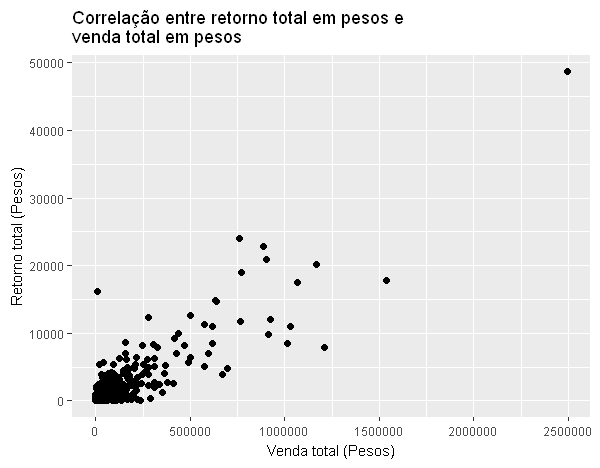

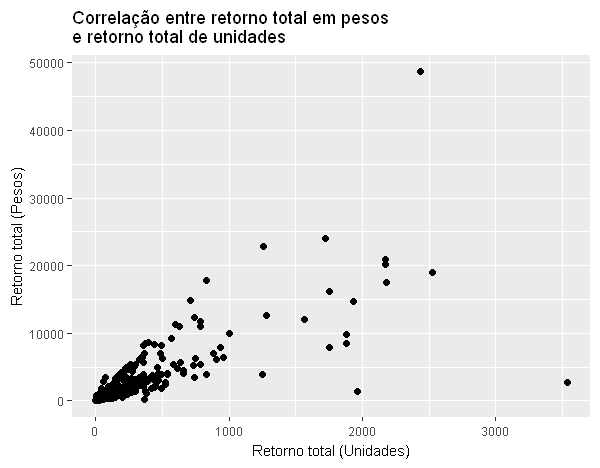

In [10]:
g0 <- ggplot(produto, aes(x = Venda.Peso.Total, y = Retorno.Peso.Total)) +
geom_point() + 
labs(x = 'Venda total (Pesos)', y = 'Retorno total (Pesos)', title = 'Correlação entre retorno total em pesos e 
venda total em pesos') +
theme(text = element_text(size = 9)) 

g1 <- ggplot(produto, aes(x = Retorno.Unidade.Total, y = Retorno.Peso.Total)) +
geom_point() + 
labs(x = 'Retorno total (Unidades)', y = 'Retorno total (Pesos)', title = 'Correlação entre retorno total em pesos 
e retorno total de unidades') +
theme(text = element_text(size = 9)) 

options(repr.plot.width = 5, repr.plot.height = 3.9)
g0; g1

Existe uma correlação forte positiva de vendas totais em pesos e retorno total em unidades com retorno total em pesos. Porém há exceções à essa relação.

In [11]:
# 50 PRODUTOS COM MAIS VENDA EM PESOS (Venda.Peso.Total)
produtos.maior.venda.peso <- produto[order(produto$Venda.Peso.Total, decreasing = T),]

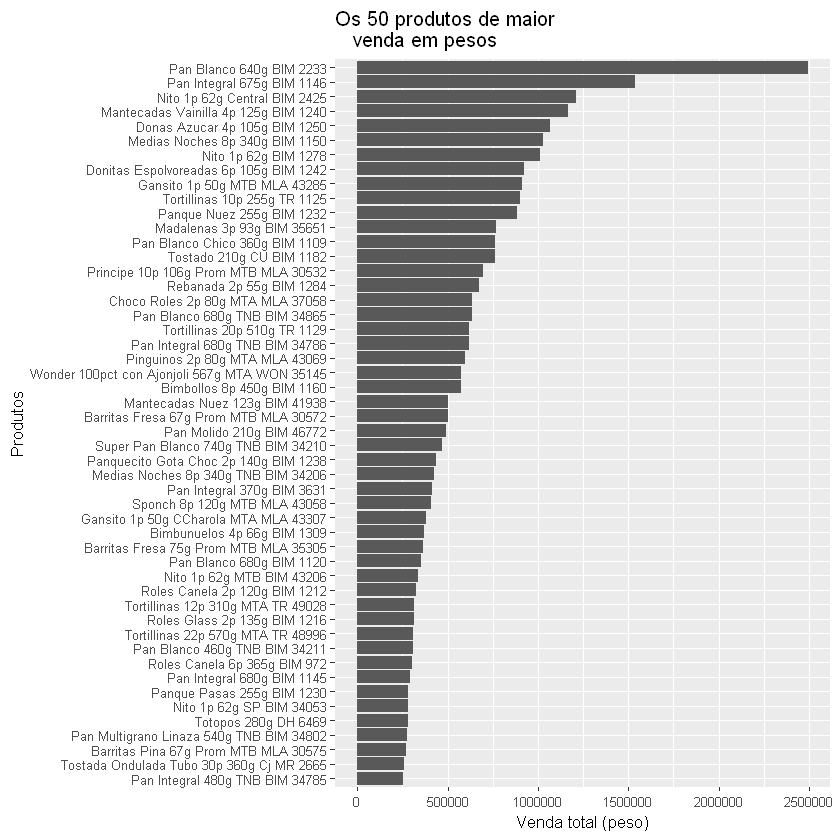

In [12]:
# GRÁFICO DOS 50 PRODUTOS DE MAIOR VENDA EM PESOS (Venda.Peso.Total) 
g3 <- ggplot(produtos.maior.venda.peso[1:50,], aes(x = reorder(Nome_Produto,Venda.Peso.Total), 
   y = Venda.Peso.Total), ) +
   geom_bar(stat = "identity") + labs(x = 'Produtos', y = 'Venda total (peso)', title = 'Os 50 produtos de maior 
   venda em pesos') +
   theme(text = element_text(size = 10)) +
   coord_flip()
options(repr.plot.width = 7, repr.plot.height = 7)
g3

                                             10 MELHORES COLOCADOS - VENDAS EM PESOS

  Produto                                            |  Pesos                          
:----------------------------------------------------|:---------:                
**1º Pan Blanco 640g BIM 2233**                      |2494290.0
**2º Pan Integral 675g BIM 1146**                    |1539084.7 
**3º Nito 1p 62g Central BIM 2425**                  |1209132.0
**4º Mantecadas Vainilla 4p 125g BIM 1240**          |1165008.5  
**5º Donas Azucar 4p 105g BIM 1250**                 |1065947.2 
**6º Medias Noches 8p 340g BIM 1150**                |1030790.6 
**7º Nito 1p 62g BIM 1278**                          |1012922.2 
**8º Donitas Espolvoreadas 6p 105g BIM 1242**        |922298.4
**9º Gansito 1p 50g MTB MLA 43285**                  |911750.1 
**10º Tortillinas 10p 255g TR 1125**                 |901665.6 

In [13]:
# 50 PRODUTOS DE MAIOR RETORNO EM PESOS (Retorno.Peso.Total) - REEMBOLSO
produtos.maior.retorno.peso <- produto[order(produto$Retorno.Peso.Total, decreasing = T),]

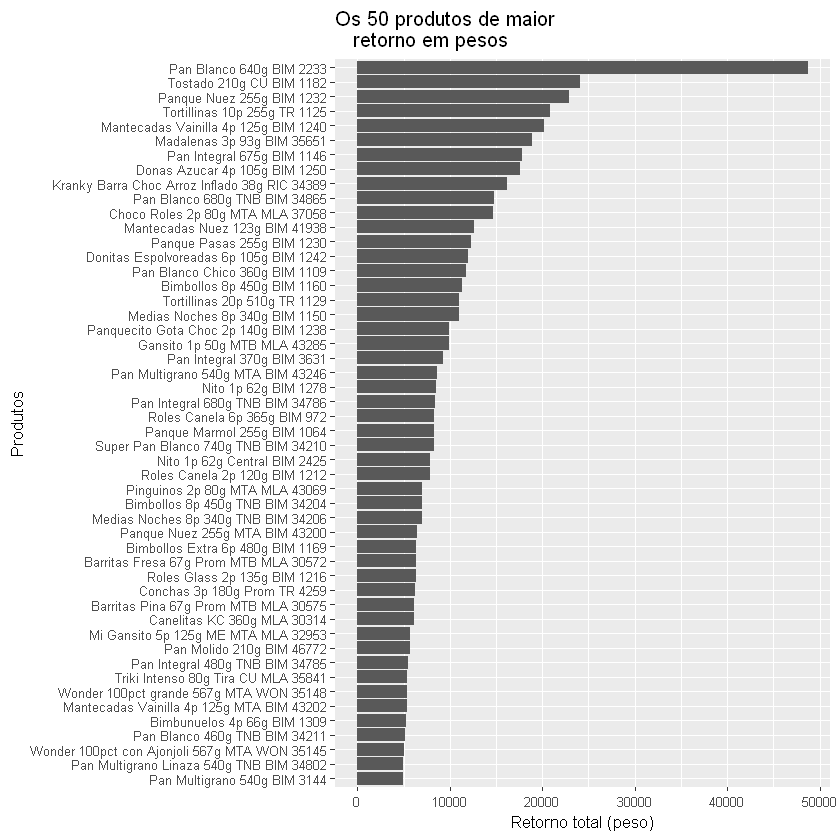

In [14]:
# GRÁFICO DOS 50 PRODUTOS DE MAIOR REEMBOLSO (Retorno.Peso.Total) 
g4 <- ggplot(produtos.maior.retorno.peso[1:50,], aes(x = reorder(Nome_Produto,Retorno.Peso.Total), 
   y = Retorno.Peso.Total), ) +
   geom_bar(stat = "identity") + labs(x = 'Produtos', y = 'Retorno total (peso)', title = 'Os 50 produtos de maior 
   retorno em pesos') +
   theme(text = element_text(size = 10)) +
   coord_flip()
options(repr.plot.width = 7, repr.plot.height = 7)
g4

                                            10 QUE MAIS RETORNAM EM PESOS (REEMBOLSO)    

  Produto                                            |  Pesos                          
:----------------------------------------------------|:---------:                
**1º Pan Blanco 640g BIM 2233**                      | 48735.84
**2º Tostado 210g CU BIM 1182**                      | 24052.74 
**3º Panque Nuez 255g BIM 1232**                     | 22922.03 
**4º Tortillinas 10p 255g TR 1125**                  | 20880.00 
**5º Mantecadas Vainilla 4p 125g BIM 1240**          | 20230.78 
**6º Madalenas 3p 93g BIM 35651**                    | 18952.50 
**7º Pan Integral 675g BIM 1146**                    | 17818.62 
**8º Donas Azucar 4p 105g BIM 1250**                 | 17596.26
**9º Kranky Barra Choc Arroz Inflado 38g RIC 34389** | 16242.04 
**10º Pan Blanco 680g TNB BIM 34865**                | 14825.32 

O Pan Blanco 640g BIM 2233 é o que mais vende em pesos e também é o que mais retorna em pesos. Mesmo sendo o que mais retorna em pesos, com base nos dados, é o mais lucrativo.

In [15]:
# CORRELAÇÃO DA VARIÁVEL Retorno.Unidade.Total COM Venda.Unidade.Total
round(cor(produto$Retorno.Peso.Total, produto[c(4,6)]),4)

Retorno.Unidade.Total,Venda.Peso.Total
0.8093,0.8819


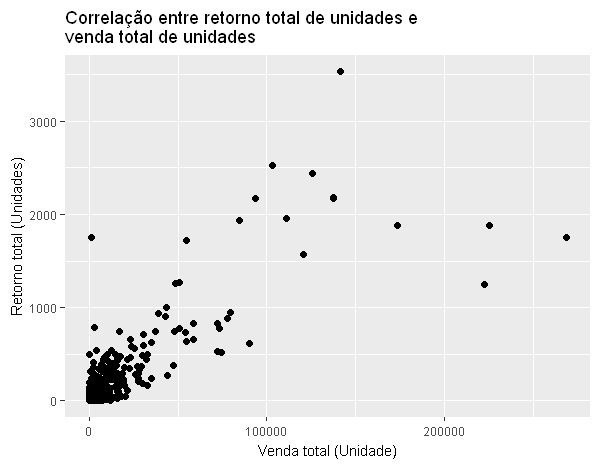

In [16]:
g5 <- ggplot(produto, aes(x = Venda.Unidade.Total, y = Retorno.Unidade.Total)) +
geom_point() + 
labs(x = 'Venda total (Unidade)', y = 'Retorno total (Unidades)', title = 'Correlação entre retorno total de unidades e 
venda total de unidades') +
theme(text = element_text(size = 9)) 
options(repr.plot.width = 5, repr.plot.height = 3.9)
g5

Existe uma correlação forte positiva de vendas totais de unidades  com retorno total de unidades. A partir do gráfico de dispersão, percebe-se que com aumento da venda total de unidades, o retorno total de unidades aumenta. Porém também existem valores que não possuem essa relação.

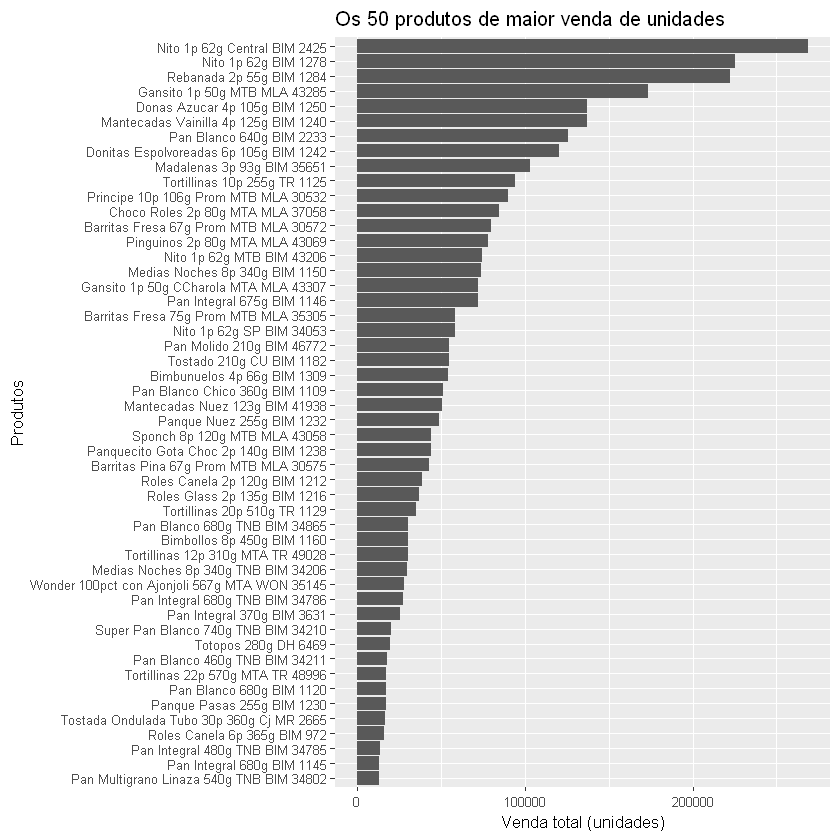

In [17]:
# GRÁFICO 50 PRODUTOS DE MAIOR VENDA (Venda.Unidade.Total) 
g6 <- ggplot(produto[1:50,], aes(x = reorder(Nome_Produto, Venda.Unidade.Total), y = Venda.Unidade.Total)) +
   geom_bar(stat = "identity") + 
   labs(x = 'Produtos', y = 'Venda total (unidades)', title = 'Os 50 produtos de maior venda de unidades') +
   theme(text = element_text(size = 10)) +
   coord_flip()
options(repr.plot.width = 7, repr.plot.height = 7)
g6

O  Nito 1p 62g Central BIM 2425, que é o 3º que mais vende em pesos, é o primeiro colocado em venda de unidades. O Pan Blanco 640g BIM 2233, o que mais vende em pesos ocupa a 7º colocação em venda de unidades.

In [18]:
# 50 PRODUTOS DE MAIOR RETORNO DE UNIDADES (Retorno.Unidade.Total) 
produtos.maior.retorno.unidade <- produto[order(produto$Retorno.Unidade.Total, decreasing = T),]

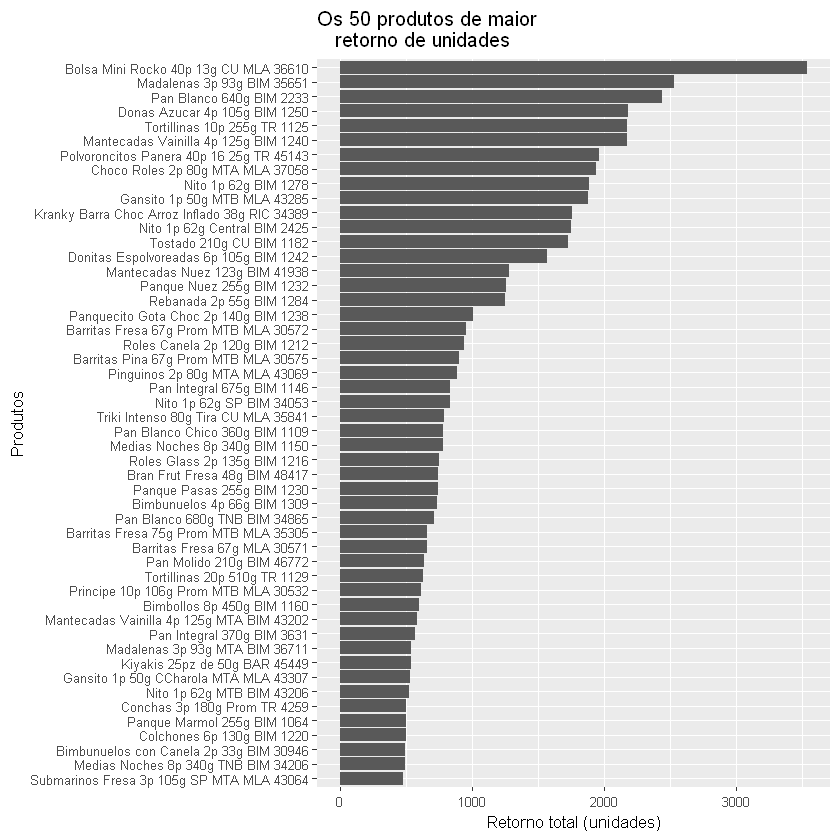

In [19]:
# GRÁFICO DOS 50 PRODUTOS DE MAIOR RETORNO DE UNIDADES (Retorno.Unidade.Total) 
g7 <- ggplot(produtos.maior.retorno.unidade[1:50,], aes(x = reorder(Nome_Produto,Retorno.Unidade.Total), 
   y = Retorno.Unidade.Total), ) +
   geom_bar(stat = "identity") + labs(x = 'Produtos', y = 'Retorno total (unidades)', title = 'Os 50 produtos de maior 
   retorno de unidades') +
   theme(text = element_text(size = 10)) +
   coord_flip()
options(repr.plot.width = 7, repr.plot.height = 7)
g7

O Bolsa Mini Rocko 40p 13g CU MLA 36610 apresenta o maior número de unidades retornadas. Mesmo existindo uma correlação forte entre retorno de unidades e vendas de unidades, esse produto não segue o padrão. Em unidades vendidas o  Bolsa Mini Rocko 40p 13g CU MLA 36610 não está nem entre os 50 maiores mais vendidos. O Nito 1p 62g Central BIM 2425, que é o produto mais vendido e o 3º em vendas em pesos, aparece em 12º lugar no ranking de retorno de unidades.

#### **ANALISANDO O PERCENTUAL DE REEMBOLSO DOS 50 PRODUTOS COM MAIS VENDA EM PESOS**

In [20]:
# PERCENTUAL DE REEMBOLSO - RETORNO EM PESOS POR VENDA EM PESOS (Retorno.Peso_por_Venda.Peso) DOS 50 MAIORES EM VENDAS EM PESOS 
maior.venda.peso.50 <- produtos.maior.venda.peso[1:50,]
percentual.retorno.50.maiores.venda.peso <- maior.venda.peso.50[order(maior.venda.peso.50$Retorno.Peso_por_Venda.Peso, 
                                                                      decreasing=F),]

In [21]:
# SEPARANDO OS DADOS DE Retorno.Peso_por_Venda.Peso PARA ANALISAR A O PERCENTUAL DE REEMBOLSO DOS 50 PRODUTOS COM MAIS
# VENDAS EM PESOS
dados <- data.frame(percentual.retorno.50.maiores.venda.peso$Nome_Produto, 
                    percentual.retorno.50.maiores.venda.peso$Retorno.Peso_por_Venda.Peso); 
colnames(dados) <- c('Nome_Produto','Reembolso.Percentual'); head(dados,3)

Nome_Produto,Reembolso.Percentual
Pan Integral 680g BIM 1145,0.13
Pan Blanco 680g BIM 1120,0.36
Rebanada 2p 55g BIM 1284,0.58


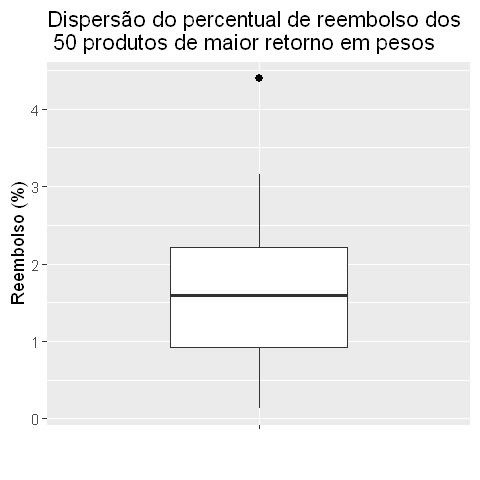

In [22]:
# BOX PLOT COM OS DADOS DO PERCENTUAL DE REEMBOLSO 
g8 <- ggplot(dados, aes(x = "", y = Reembolso.Percentual)) +
  geom_boxplot(width = .5,  outlier.colour ="black", outlier.size = 2) +
  labs(title = "Dispersão do percentual de reembolso dos \n 50 produtos de maior retorno em pesos", x = "", 
       y = "Reembolso (%)")
options(repr.plot.width = 4, repr.plot.height = 4)
g8

In [23]:
summary(dados$Reembolso.Percentual)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.130   0.925   1.590   1.588   2.208   4.390 

In [24]:
# CÁLCULO DA MÉDIA
cat('Estatísticas do percentual de reembolso dos 50 produtos com maior venda em pesos')
media <- mean(dados$Reembolso.Percentual); cat(sprintf("\nMédia: %s", media))
# CÁLCULO VARIÂNCIA, DESVIO PADRÃO E COEFICIENTE DE VARIAÇÃO
desvio.padrao <- sd(dados$Reembolso.Percentual); cat(sprintf('\nDesvio padrão: %s', round(desvio.padrao,4)))
cv <- round(desvio.padrao/media*100,2); cat(sprintf("\nCoeficiente de Variação(percentual): %s", cv))

Estatísticas do percentual de reembolso dos 50 produtos com maior venda em pesos
Média: 1.5884
Desvio padrão: 0.8115
Coeficiente de Variação(percentual): 51.09

Conforme boxplot  dos  50 produtos de maior venda em pesos, 50% dos produtos estão com o percentual de reembolso abaixo da média que é de 1.159%. Entretanto existe uma parte considerável de produtos com percentual de reembolso acima da média. Com um coeficiente de variação relativamente alto são necessárias medidas que visem reduzir esse percentual, principalmente dos produtos que estão mais acima do valor da mediana.

#### **DEPÓSITOS**

In [25]:
# DEPÓSITO
estado.cidade.deposito <- df_bimbo %>%
  group_by(Deposito_ID) %>%
  summarise(Demanda.Ajustada.Total = sum(Demanda.Ajustada),
            Venda.Unidade.Total = sum(Venda.Unidade),
            Retorno.Unidade.Total = sum(Retorno.Unidade),
            Venda.Peso.Total = sum(Venda.Peso),
            Retorno.Peso.Total = sum(Retorno.Peso)) %>%
  inner_join(df_estado, by = 'Deposito_ID') %>%
  select(Deposito_ID, Estado, Cidade, everything())

estado.cidade.deposito<- estado.cidade.deposito %>%
  mutate(Retorno.Peso_por_Venda.Peso = round(Retorno.Peso.Total/Venda.Peso.Total*100,2))

In [26]:
# DEPÓSITOS
deposito1 <- estado.cidade.deposito[order(estado.cidade.deposito$Venda.Peso.Total, decreasing = T),]
g9 <- ggplot(deposito1[1:8,], aes(x = reorder(Deposito_ID, -Venda.Peso.Total), y = Venda.Peso.Total)) +
geom_bar(stat = 'identity') +
labs(x = 'Depósitos', y = 'Vendas totais em pesos', title = 'Depósitos de maior venda (Pesos)') +
theme(text = element_text(size = 8)) 

deposito2 <- estado.cidade.deposito[order(estado.cidade.deposito$Venda.Unidade.Total, decreasing = T),]
g10 <- ggplot(deposito2[1:8,], aes(x = reorder(Deposito_ID, -Venda.Unidade.Total), y = Venda.Unidade.Total )) +
geom_bar(stat = 'identity') +
labs(x = 'Depósitos', y = 'Vendas totais em unidades', title = 'Depósitos de maior venda (Unidades)') +
theme(text = element_text(size = 8)) 

deposito3 <- estado.cidade.deposito[order(estado.cidade.deposito$Retorno.Peso.Total, decreasing = T),]
g11 <- ggplot(deposito3[1:8,], aes(x = reorder(Deposito_ID, -Retorno.Peso.Total), y = Retorno.Peso.Total )) +
geom_bar(stat = 'identity') +
labs(x = 'Depósitos', y = 'Retorno em pesos', title = 'Depósitos com maior retorno em pesos') +
theme(text = element_text(size = 8)) 

deposito4 <- estado.cidade.deposito[order(estado.cidade.deposito$Retorno.Unidade.Total, decreasing = T),]
g12 <- ggplot(deposito4[1:8,], aes(x = reorder(Deposito_ID, -Retorno.Unidade.Total), y = Retorno.Unidade.Total )) +
geom_bar(stat = 'identity') +
labs(x = 'Depósitos', y = 'Retorno em unidades', title = 'Depósitos com maior retorno em unidades') +
theme(text = element_text(size = 8)) 

deposito5 <- estado.cidade.deposito[order(estado.cidade.deposito$Venda.Peso.Total, decreasing = T),]
g13 <- ggplot(deposito5[1:8,], aes(x = reorder(Deposito_ID, -Retorno.Peso_por_Venda.Peso), y = Retorno.Peso_por_Venda.Peso)) +
geom_bar(stat = 'identity') +
labs(x = 'Depósitos',y = 'Percentual de reembolso (%)',title ='Depósitos com maior venda em pesos e percentual \nde reembolso')+
theme(text = element_text(size = 8)) 

deposito6 <- estado.cidade.deposito[order(estado.cidade.deposito$Retorno.Peso_por_Venda.Peso, decreasing = T),]
g14 <- ggplot(deposito6[1:8,], aes(x = reorder(Deposito_ID, -Retorno.Peso_por_Venda.Peso), y = Retorno.Peso_por_Venda.Peso)) +
geom_bar(stat = 'identity') +
labs(x = 'Depósitos', y = 'Percentual de reembolso (%)', title = 'Depósitos com maior percentual de reembolso') +
theme(text = element_text(size = 8)) 

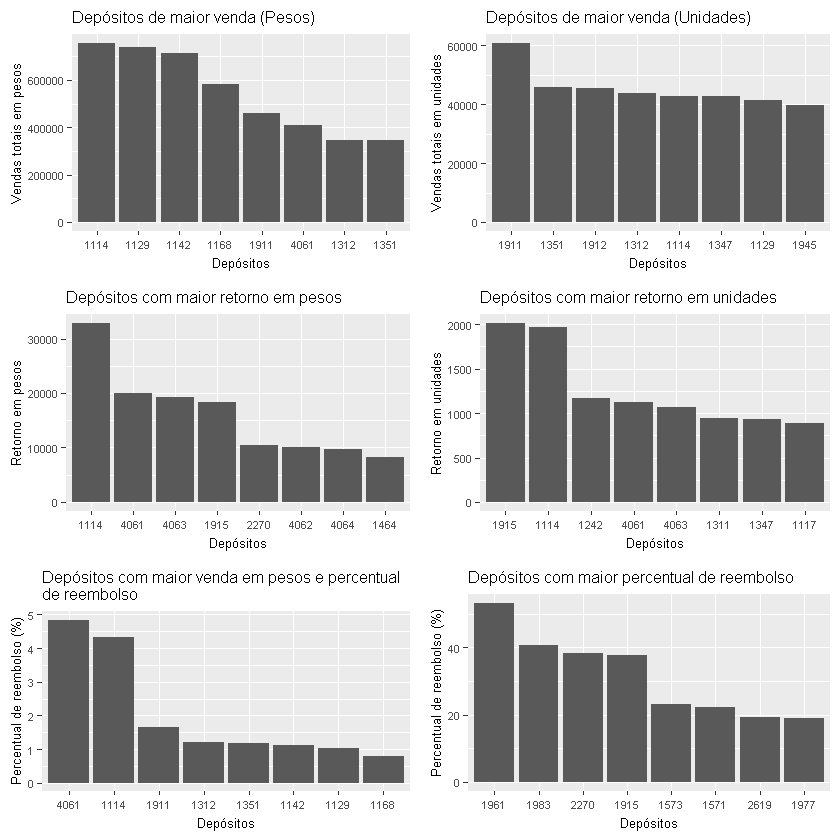

In [27]:
options(repr.plot.width = 7, repr.plot.height = 7)
grid.arrange(g9, g10, g11, g12, g13, g14, ncol = 2, nrow = 3)

Atenção para o depósito 1114  que ocupa a 5ª colocação dos depósitos onde se tem maior venda. Dos de maior venda, apresenta a maior perda de venda (%) ultrapassando os 4,5%, o que é aproximadamente o dobro do segundo colocado em maior venda, o 1347. Comparando com todos os depósitos, é o segundo de maior retorno de unidades.

#### **ESTADOS**

In [28]:
# ESTADO 
estado <- estado.cidade.deposito %>%
  group_by(Estado) %>%
  summarise(Demanda.Ajustada.Total = sum(Demanda.Ajustada.Total),
            Venda.Unidade.Total = sum(Venda.Unidade.Total),
            Retorno.Unidade.Total = sum(Retorno.Unidade.Total),
            Venda.Peso.Total = sum(Venda.Peso.Total),
            Retorno.Peso.Total = sum(Retorno.Peso.Total),
            Retorno.Peso_por_Venda.Peso = round(Retorno.Peso.Total/Venda.Peso.Total*100, 2))

In [29]:
# ESTADOS DE MAIOR VENDA EM PESOS
estado1 <- estado[order(estado$Venda.Peso.Total, decreasing = T),]
g15 <- ggplot(estado1[1:8,], aes(x = reorder(Estado, Venda.Peso.Total), y = Venda.Peso.Total)) +
geom_bar(stat = 'identity') +
labs(x = 'Estado', y = 'Vendas totais em pesos', title = 'Estados onde se têm mais vendas em pesos') +
theme(text = element_text(size = 8)) +
coord_flip()

# ESTADOS DE MAIOR RETORNO EM PESOS
estado2 <- estado[order(estado$Retorno.Peso.Total, decreasing = T),]
g17 <- ggplot(estado2[1:8,], aes(x = reorder(Estado, Retorno.Peso.Total), y = Retorno.Peso.Total)) +
geom_bar(stat = 'identity') +
labs(x = 'Estado', y = 'Retornos em pesos', title = 'Estados onde se têm maior retorno em pesos') +
theme(text = element_text(size = 8)) +
coord_flip()

# ESTADOS DE MAIOR VENDA EM UNIDADES
estado3 <- estado[order(estado$Venda.Unidade.Total, decreasing = T),]
g16 <- ggplot(estado3[1:8,], aes(x = reorder(Estado, Venda.Unidade.Total), y = Venda.Unidade.Total)) +
geom_bar(stat = 'identity') +
labs(x = 'Estado', y = 'Vendas totais em em unidades', title = 'Estados onde se têm mais vendas em unidades') +
theme(text = element_text(size = 8)) +
coord_flip()

# ESTADOS DE MAIOR RETORNO EM UNIDADES
estado4 <- estado[order(estado$Retorno.Unidade.Total, decreasing = T),]
g18 <- ggplot(estado4[1:8,], aes(x = reorder(Estado, Retorno.Unidade.Total), y = Retorno.Unidade.Total)) +
geom_bar(stat = 'identity') +
labs(x = 'Estado', y = 'Retornos em unidades', title = 'Estados onde se têm maior retorno em unidades') +
theme(text = element_text(size = 8)) +
coord_flip()

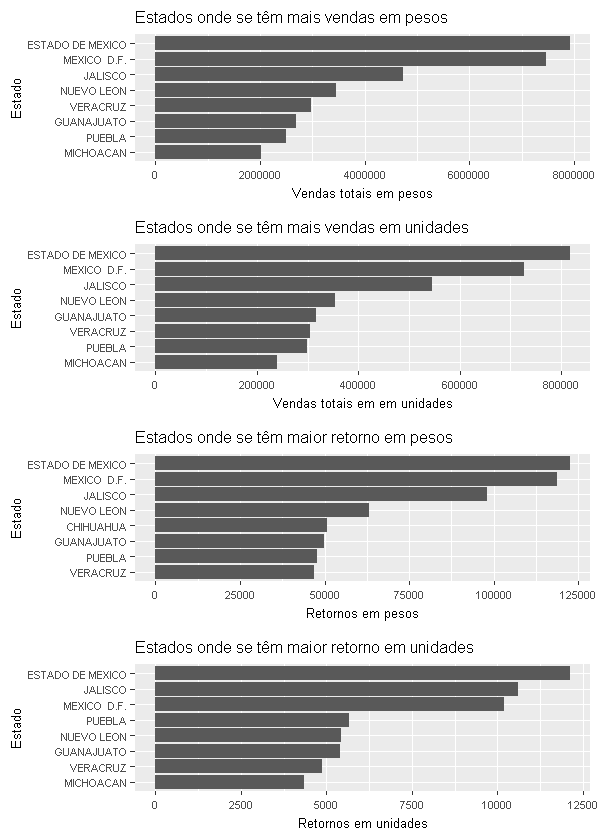

In [30]:
options(repr.plot.width = 5, repr.plot.height = 7)
grid.arrange(g15, g16, g17, g18, ncol = 1, nrow = 4)

#### **CIDADES**

In [31]:
# CIDADE 
cidade <- estado.cidade.deposito %>%
  group_by(Cidade) %>%
  summarise(Demanda.Ajustada.Total = sum(Demanda.Ajustada.Total),
            Venda.Unidade.Total = sum(Venda.Unidade.Total),
            Retorno.Unidade.Total = sum(Retorno.Unidade.Total),
            Venda.Peso.Total = sum(Venda.Peso.Total),
            Retorno.Peso.Total = sum(Retorno.Peso.Total),
            Retorno.Peso_por_Venda.Peso = round(Retorno.Peso.Total/Venda.Peso.Total*100, 2))

In [32]:
# CIDADES DE MAIOR VENDA EM PESOS
cidade1 <- cidade[order(cidade$Venda.Peso.Total, decreasing = T),]
g19 <- ggplot(cidade1[1:8,], aes(x = reorder(Cidade, Venda.Peso.Total), y = Venda.Peso.Total)) +
geom_bar(stat = 'identity') +
labs(x = 'Cidades', y = 'Vendas em pesos', title = 'Cidades onde se têm mais vendas em pesos') +
theme(text = element_text(size = 8)) +
coord_flip()

# CIDADES DE MAIOR RETORNO EM PESOS
cidade2 <- cidade[order(cidade$Venda.Peso.Total, decreasing = T),]
g20 <- ggplot(cidade2[1:8,], aes(x = reorder(Cidade, Retorno.Peso.Total), y = Retorno.Peso.Total)) +
geom_bar(stat = 'identity') +
labs(x = 'Cidades', y = 'Retorno em pesos', title = 'Cidades onde se têm mais retorno em pesos') +
theme(text = element_text(size = 8)) +
coord_flip()

# CIDADES DE MAIOR VENDA EM UNIDADES
cidade3 <- cidade[order(cidade$Venda.Unidade.Total, decreasing = T),]
g21 <- ggplot(cidade3[1:8,], aes(x = reorder(Cidade, Venda.Unidade.Total), y = Venda.Unidade.Total)) +
geom_bar(stat = 'identity') +
labs(x = 'Cidades', y = 'Vendas em unidades', title = 'Cidades onde se têm mais vendas em unidades') +
theme(text = element_text(size = 8)) +
coord_flip()

# CIDADES DE MAIOR RETORNO EM UNIDADES
cidade4 <- cidade[order(cidade$Retorno.Unidade.Total, decreasing = T),]
g22 <- ggplot(cidade4[1:8,], aes(x = reorder(Cidade, Retorno.Unidade.Total), y = Retorno.Unidade.Total)) +
geom_bar(stat = 'identity') +
labs(x = 'Cidades', y = 'Retorno em unidades', title = 'Cidades onde se têm mais retorno em unidades') +
theme(text = element_text(size = 8)) +
coord_flip()

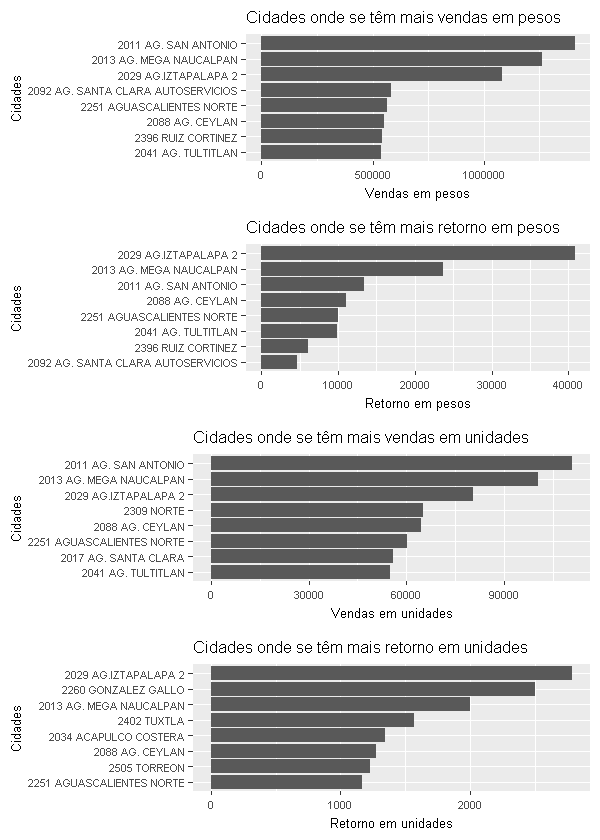

In [33]:
options(repr.plot.width = 5, repr.plot.height = 7)
grid.arrange(g19, g20, g21, g22, ncol = 1, nrow = 4)

#### **CLIENTES**

In [34]:
# CLIENTES
cliente <- df_bimbo %>%
  group_by(Cliente_ID) %>%
  summarise(Demanda.Ajustada.Total = sum(Demanda.Ajustada),
            Venda.Unidade.Total = sum(Venda.Unidade),
            Retorno.Unidade.Total = sum(Retorno.Unidade),
            Venda.Peso.Total = sum(Venda.Peso),
            Retorno.Peso.Total = sum(Retorno.Peso)) %>%
  inner_join(df_cliente, by = 'Cliente_ID') %>%
  select(Nome_Cliente, everything())

cliente <- cliente %>%
  mutate(Retorno.Peso_por_Venda.Peso = round(Retorno.Peso.Total/Venda.Peso.Total*100,2))

In [35]:
# CLIENTES QUE MAIS COMPRARAM EM PESOS
cliente1 <- cliente[order(cliente$Venda.Peso.Total, decreasing = T),]
g19 <- ggplot(cliente1[1:5,], aes(x = reorder(Nome_Cliente, Venda.Peso.Total), y = Venda.Peso.Total)) +
geom_bar(stat = 'identity') +
labs(x = 'Clientes', y = 'Compras totais em pesos', title = 'Clientes que mais compraram') +
theme(text = element_text(size = 8)) +
coord_flip()

# CLIENTES QUE RETORNARAM EM PESOS
cliente2 <- cliente[order(cliente$Retorno.Peso.Total, decreasing = T),]
g20 <- ggplot(cliente2[1:5,], aes(x = reorder(Nome_Cliente, Retorno.Peso.Total), y = Retorno.Peso.Total)) +
geom_bar(stat = 'identity') +
labs(x = 'Clientes', y = 'Retornos totais em pesos', title = 'Clientes que mais retornaram') +
theme(text = element_text(size = 8)) +
coord_flip()

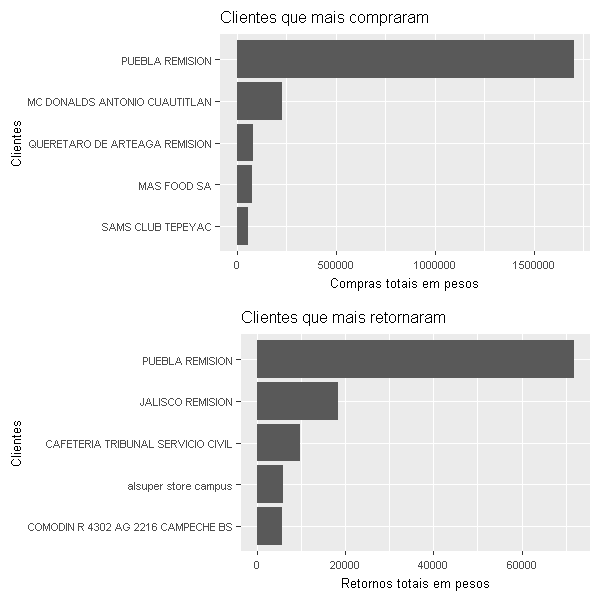

In [36]:
options(repr.plot.width = 5, repr.plot.height = 5)
grid.arrange(g19, g20, ncol = 1, nrow = 2)

#### **CORRELAÇÃO DA VARIÁVEIS**

In [37]:
# CORRELAÇÃO DE VARIÁVEIS DO DATASET DA AMOSTRA DO DATASET BIMBO
corr_df_bimbo <- cor(df_bimbo)

In [38]:
# CARREGANDO O PACOTE corrplot
suppressPackageStartupMessages({library(corrplot)})

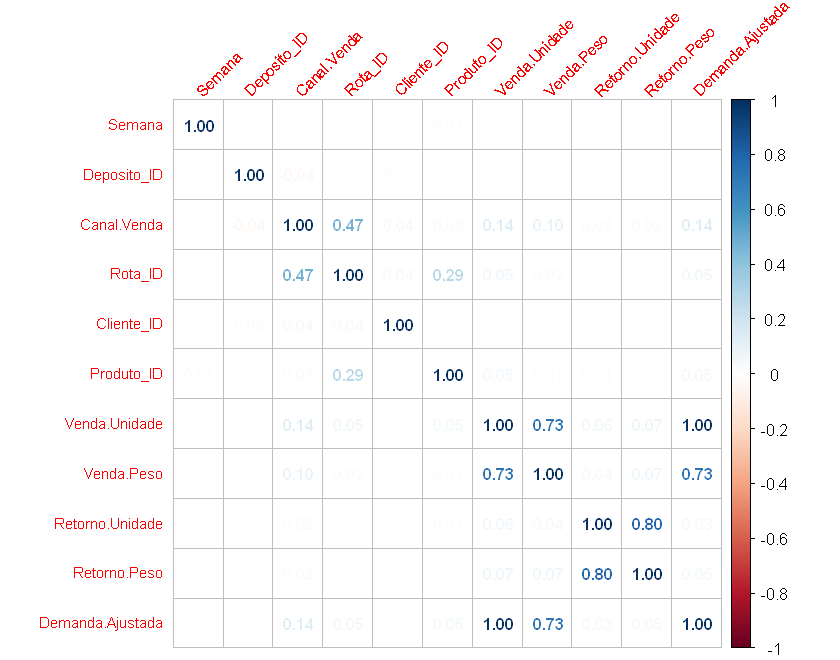

In [39]:
options(repr.plot.width = 7, repr.plot.height = 5.5)
correlacao_plot <- corrplot(corr_df_bimbo, method = "number", tl.cex = 0.75, number.cex = 0.8, tl.srt = 45)

In [ ]:
# CARREGANDO BIBLIOTECA CaTools
#suppressPackageStartupMessages({library(caTools)})

In [ ]:
# PADRONIZAÇÃO DE DADOS

#df_bimbo_padronizado <- scale(df_bimbo[, c(7:10)])
#df_bimbo_padronizado  <- cbind(df_bimbo[, c(1:6,11)], df_bimbo_padronizado)

#glimpse(df_bimbo_padronizado)

In [ ]:
# DADOS DE TREINO (APROX. 70%) E TESTE (APROX. 30%)
#divisao_treino_teste <- sample.split(df_bimbo_padronizado$Demanda.Ajustada, SplitRatio = 0.70)

In [ ]:
#dados_treino <- subset(df_bimbo_padronizado, divisao_treino_teste == TRUE)
#dados_teste <- subset(df_bimbo_padronizado, divisao_treino_teste == FALSE)

In [ ]:
#nrow(dados_treino)
#nrow(dados_teste)

In [ ]:
#write_csv(dados_treino, "dados_treino.csv")

In [ ]:
#write_csv(dados_teste, "dados_teste.csv")

### **2 - APRENDIZADO**

#### **TREINANDO O MODELO**

In [ ]:
# CRIAÇÃO DO MODELO USANDO LINEAR REGRESSION (lm)
#modelo <- lm(Demanda.Ajustada ~., data = dados_treino); summary(modelo)

In [ ]:
# SALVAR MODELO CRIADO
#saveRDS(modelo, "modelo.rds")

In [40]:
# CARREGANDO BIBLIOTECAS
suppressPackageStartupMessages({library(dplyr)
library(ggplot2)
library(caret)
library(data.table)
library(tibble)
library(readr)
library(tidyr)})

#### **CARREGANDO O MODELO TREINADO**


In [41]:
# CARREGANDO MODELO CRIADO
modelo <- readRDS("modelo.rds")
summary(modelo)


Call:
lm(formula = Demanda.Ajustada ~ ., data = dados_treino)

Residuals:
     Min       1Q   Median       3Q      Max 
-112.331    0.011    0.020    0.036  235.312 

Coefficients:
                        Estimate       Std. Error   t value
(Intercept)      7.2075115901444  0.0039383943603  1830.063
Semana          -0.0008202194593  0.0005411088992    -1.516
Deposito_ID     -0.0000000332542  0.0000002646734    -0.126
Canal.Venda      0.0008346361591  0.0008533986292     0.978
Rota_ID          0.0000061634882  0.0000008667853     7.111
Cliente_ID       0.0000000002543  0.0000000002613     0.973
Produto_ID      -0.0000002508956  0.0000000610729    -4.108
Venda.Unidade   21.1980327208009  0.0014865806608 14259.591
Venda.Peso       0.0251610120007  0.0014040516495    17.920
Retorno.Unidade -0.7804416219258  0.0026564236966  -293.794
Retorno.Peso    -0.2746045417558  0.0020811257853  -131.950
                            Pr(>|t|)    
(Intercept)     < 0.0000000000000002 ***
Semana          

In [42]:
varImp(modelo)
#plot(varImp(modelo))

,Overall
Semana,1.5158122
Deposito_ID,0.1256422
Canal.Venda,0.9780144
Rota_ID,7.1107441
Cliente_ID,0.9732041
Produto_ID,4.1081321
Venda.Unidade,14259.5913431
Venda.Peso,17.9202895
Retorno.Unidade,293.7941048
Retorno.Peso,131.9499973


In [43]:
residuos_modelo <- residuals(modelo)
residuos_modelo <- as.data.frame(residuos_modelo)
head(residuos_modelo,5)
sum(residuos_modelo)

residuos_modelo
0.02275495
0.10044039
0.01954235
0.03584167
0.01605505


[1] 0.000000000001443882

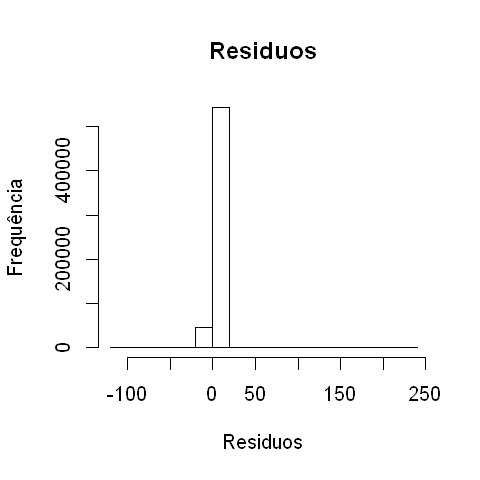

In [44]:
# HISTOGRAMA DE RESÍDUOS DO MODELO
options(repr.plot.width = 4, repr.plot.height = 4)
hist(residuos_modelo$residuos_modelo, main = 'Residuos',
     xlab = 'Residuos', ylab = 'Frequência')

In [45]:
# CARREGAR DADOS DE TESTE
dados_teste <- read.csv("dados_teste.csv")

#### **PREVISÃO COM O MODELO TREINADO**

In [46]:
# PREVISÃO DO MODELO 
Previsao <- predict(modelo, dados_teste)

In [47]:
# UNINDO COLUNA DE PREVISÃO AO DATASET
observado_previsto <- cbind(dados_teste, Previsao)
head(observado_previsto[,c(1,2,6,7,12)])

Semana,Deposito_ID,Produto_ID,Demanda.Ajustada,Previsao
3,2017,30575,3,2.987973
3,1462,43206,33,32.819721
3,1140,30575,5,4.977527
3,2234,31309,8,7.956981
3,1224,30575,4,3.977138
3,1459,43197,5,4.964820


In [48]:
# EXISTE VALORES NEGATIVOS NA COLUNA DE PREVISÃO?
any(observado_previsto$Previsao < 0)

[1] TRUE

In [49]:
# TRATANDO OS VALORES NEGATIVOS DA PREVISÃO
converterNegativo <- function(vetor){
    for (p in vetor){
        if (p < 0){
            return(0)
        } else{
            return(p)
        }
    }
}

observado_previsto[,12] <- sapply(observado_previsto$Previsao, converterNegativo)

# EXISTE VALORES NEGATIVOS?
any(observado_previsto$Previsao < 0)

[1] FALSE

<h1><font size="5" face="Calibri">
3 - MÉTRICAS  DO MODELO TESTADO
</font></h1>

In [50]:
# MÉTRICAS
# CÁLCULO DE ERRO
observado_previsto <- observado_previsto %>%
                      mutate(erro_previsao = observado_previsto$Demanda.Ajustada - observado_previsto$Previsao)
head(observado_previsto[,c(1,2,6,7,12,13)])

Semana,Deposito_ID,Produto_ID,Demanda.Ajustada,Previsao,erro_previsao
3,2017,30575,3,2.987973,0.01202663
3,1462,43206,33,32.819721,0.18027949
3,1140,30575,5,4.977527,0.02247307
3,2234,31309,8,7.956981,0.04301916
3,1224,30575,4,3.977138,0.02286238
3,1459,43197,5,4.964820,0.03518038


Maioria dos valores estão próximos de zero.

In [51]:
# MSE - ERRO MÉDIO (DISTÂNCIA DOS VALORE PREVISTOS PELOS OBSERVADOS)
MSE <- round(sum((observado_previsto$Demanda.Ajustada -observado_previsto$Previsao)^2)/nrow(dados_teste), 4); MSE

[1] 0.3592

In [52]:
# MAE (MEAN ABSOLUTE ERROR ) - IDEIA DE QUÃO ERRADAS ESTÃO AS PREVISÕES
MAE <- round(sum(abs(observado_previsto$Demanda.Ajustada - observado_previsto$Previsao))/nrow(dados_teste), 4); MAE

[1] 0.0819

MAE próximo do ideal que é zero.

In [53]:
# R² (COEFICIENTE DE DETERMINAÇÃO) - NÍVEL DE PRECISÃO DAS PREVISÕES
SSE = sum((observado_previsto$Demanda.Ajustada - observado_previsto$Previsao)^2)
SST = sum((observado_previsto$Demanda.Ajustada - mean(observado_previsto$Demanda.Ajustada))^2)
R2 = 1 - (SSE/SST); round(R2, 4)

[1] 0.9988

R² = 0.9988 